In [9]:
#Part1-1
import pulp
# Define the problem
problem = pulp.LpProblem("Minimize Shipping Costs", pulp.LpMinimize)

# Decision variables
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(6) for j in range(3)), lowBound=0, cat='Integer')

# Shipping costs
C1 = [
    [12, 15, 17],
    [14, 9, 10],
    [13, 20, 11],
    [17, 16, 19],
    [7, 14, 12],
    [22, 16, 18]
]

# Waste production per week
waste_perweek = [45, 26, 42, 53, 29, 38]

# Waste disposal site capacities
disposal_capacities = [65, 80, 105]

# Objective function
problem += pulp.lpSum(C1[i][j] * x[i, j] for i in range(6) for j in range(3))

# Constraint 1
for i in range(6):
    problem += pulp.lpSum(x[i, j] for j in range(3)) == waste_perweek [i]
# Constraint 2
for j in range(3):
    problem += pulp.lpSum(x[i, j] for i in range(6)) <= disposal_capacities[j]

# Solve the problem
problem.solve()

# Print the results
print(pulp.LpStatus[problem.status])
print("Optimal value:", pulp.value(problem.objective))
print("Optimal solution:")
for v in problem.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

Optimal
Optimal value: 2988.0
Optimal solution:
x_(0,_0) = 45.0
x_(1,_2) = 26.0
x_(2,_2) = 42.0
x_(3,_1) = 53.0
x_(4,_0) = 20.0
x_(4,_2) = 9.0
x_(5,_1) = 27.0
x_(5,_2) = 11.0


In the case without transshipment, the optimal solution for distribution of waste is as follows:

Denver needs to convey 45 barrels of waste to Orangeburg;
<br/>Morganton needs to convey 26 barrels of waste to Macon;
<br/>Morrisville needs to convey 42 barrels of waste to Macon;
<br/>Pineville needs to convey 53 barrels of waste to Florence;
<br/>Rockhill needs to convey 20 barrels of waste to Orangeburg and 9 barrels of waste to Macon;
<br/>Statesville needs to convey 27 barrels of waste to Florence and 11 barrels of waste to Macon

In [8]:
#Part1-2

# Define the problem
problem = pulp.LpProblem("Minimize Shipping Costs", pulp.LpMinimize)

# Add two more Decision variables
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(6) for j in range(3)), lowBound=0, cat='Integer')
y = pulp.LpVariable.dicts("y", ((i, k) for i in range(6) for k in range(6)), lowBound=0, cat='Integer')
z = pulp.LpVariable.dicts("z", ((l, j) for j in range(3) for l in range(3)), lowBound=0, cat='Integer')

# Shipping costs
C1 = [
    [12, 15, 17],
    [14, 9, 10],
    [13, 20, 11],
    [17, 16, 19],
    [7, 14, 12],
    [22, 16, 18]
]

C2 = [
    [100, 3, 4, 9, 5, 4],
    [6, 100, 7, 6, 9, 4],
    [5, 7, 100, 3, 4, 9],
    [5, 4, 3,100, 3, 11],
    [5, 9, 5, 3, 100, 14],
    [4, 7, 11, 12, 8, 100]
]

C3 = [
    [100, 12, 10],
    [12,100, 15],
    [10, 15, 100]
]


# Objective function
problem += pulp.lpSum(C1[i][j] * x[i, j] for i in range(6) for j in range(3)) + pulp.lpSum(C2[i][k] * y[i, k] for i in range(6) for k in range(6)) + pulp.lpSum(C3[j][l] * z[j, l] for j in range(3) for l in range(3))

# Constraint 1
for i in range(6):
    problem += pulp.lpSum(x[i, j] for j in range(3)) + pulp.lpSum(y[i, k] for k in range(6))- pulp.lpSum(y[k, i] for k in range(6)) == waste_perweek[i]
# Constraint 2
for j in range(3):
    problem += pulp.lpSum(x[i, j] for i in range(6)) + pulp.lpSum(z[l, j] for l in range(3)) <= disposal_capacities[j]


# Solve the problem
problem.solve()

# Print the results
print(pulp.LpStatus[problem.status])
print("Optimal value:", pulp.value(problem.objective))
print("Optimal solution:")
for v in problem.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

Optimal
Optimal value: 2674.0
Optimal solution:
x_(1,_1) = 42.0
x_(1,_2) = 46.0
x_(2,_2) = 42.0
x_(4,_0) = 65.0
x_(5,_1) = 38.0
y_(0,_1) = 45.0
y_(3,_1) = 17.0
y_(3,_4) = 36.0


c:\Users\JY\.ipython\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In the case with transshipment, the optimal solution for distribution of waste is as follows:

Denver needs to convey 45 barrels of waste to Morganton plant;
<br/>Morganton needs to convey 42 barrels of waste to Florence and 46 barrels of waste to Macon;
<br/>Morrisville needs to convey 42 barrels of waste to Macon;
<br/>Pineville needs to convey 17 barrels of waste to Morganton plant and 36 barrels of waste to Rockhill plant;
<br/>Rockhill needs to convey 65barrels of waste to Orangeburg;
<br/>Statesville needs to convey 38 barrels of waste to Florence.

In [7]:
#Part 2-1
import numpy as np
from scipy.optimize import minimize

# Define your data: expected returns, covariance matrix, and minimum baseline return
expected_returns = np.array([0.07,0.12,0.11,0.14,0.14,0.09])
covariance_matrix = np.array([[0.001,0.0003,-0.0003,0.00035,-0.00035,0.0004],
                             [0,0.009,0.0004,0.0016,-0.0016,0.0006],
                             [0,0,0.008,0.0015,-0.0055,-0.0007],
                             [0,0,0,0.012,-0.0005,0.0008],
                             [0,0,0,0,0.012,-0.0008],
                             [0,0,0,0,0,0.005]])
min_return = 0.11

n = len(expected_returns)

#obejective function
def portfolio_risk(x, covariance_matrix):
    return x @ covariance_matrix @ x
# Constraints
def constraint_sum_to_one(x):
    return np.sum(x) - 1
def constraint_min_return(x, expected_returns, min_return):
    return expected_returns @ x - min_return
constraints = (
    {"type": "eq", "fun": constraint_sum_to_one},
    {"type": "ineq", "fun": lambda x: constraint_min_return(x, expected_returns, min_return)},
)

bounds = [(0, 1) for _ in range(n)]
initial_guess = np.array([1/n] * n)
result = minimize(
    portfolio_risk, initial_guess, args=(covariance_matrix), constraints=constraints, bounds=bounds
)
optimal_allocations = result.x

optimal_allocations



array([0.195408  , 0.13954931, 0.18655866, 0.11176972, 0.20804043,
       0.15867388])

To pursue the minimum expected return of 11% at a minimum risk, our investor are supposed to
invest $1,954 in bonds, $1,395 in high tech stocks, $1,866 in foreign stocks, $1,118 in call options and $1,587 in
gold.

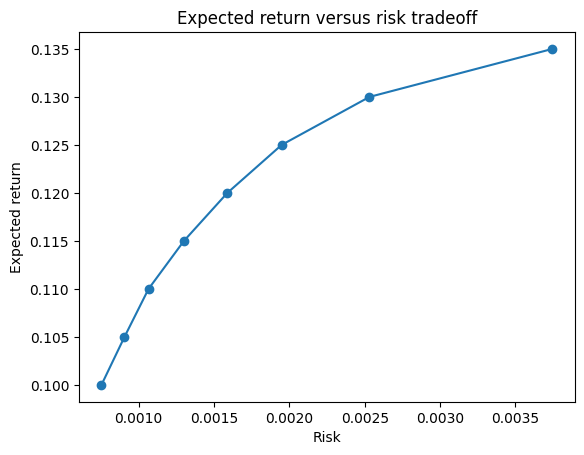

In [6]:
# Part 2-2
risk_return_pairs = []

for min_return in [0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135]:
    constraints = (
        {"type": "eq", "fun": constraint_sum_to_one},
        {"type": "ineq", "fun": lambda x: constraint_min_return(x, expected_returns, min_return)},
    )
    
    result = minimize(
        portfolio_risk, initial_guess, args=(covariance_matrix), constraints=constraints, bounds=bounds
    )
    
    risk_return_pairs.append((result.fun, expected_returns @ result.x))

# Plot the results
import matplotlib.pyplot as plt

risks, returns = zip(*risk_return_pairs)

plt.plot(risks, returns, "o-")
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Expected return versus risk tradeoff")
plt.show()

The optimization results show that the risks increase from 0.00075 to 0.0037 as the expected portfolio
returns increase from 0.1 to 0.135.